# Consumo de combustibles

Autor: Juan Camilo Jaramillo Tascón: https://www.linkedin.com/in/juancjaramillot/

In [1]:
#pip install pydataxm

In [2]:
from pydataxm import *
import datetime as dt     
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
objetoAPI = pydataxm.ReadDB()

## Consumo de combustible MBTU - Recurso

In [ ]:
# obtenemos los datos de la API de XM
df_cc = objetoAPI.request_data(
                        "ConsCombustibleMBTU",           
                        "Recurso",                
                        dt.date(2021, 12, 22),    
                        dt.date(2022, 12, 22))

## Serie de tiempo diaria del consumo MBTU por combustible

In [5]:
# copiamos el df y convertimos los NaN en 0
df_st = df_cc.copy().fillna(0)  

# eliminamos columnas innecesarias
df_st = df_st.drop(columns=['Id', 'Values_code'])

# obtenemos el consumo diario y lo guardamos en una nueva columna
df_st['MBTU_dia'] = df_st.sum(axis=1, numeric_only=True) 

# eliminamos columnas que ya no necesitamos
df_st = df_st.drop(columns=list(df_st.columns[1:-2]))

# pivoteamos el df
df_st = round(df_st.pivot_table(
    index=['Date'],
    columns=['Values_Name'],
    values=['MBTU_dia']
).fillna(0),2)

#renombramo columnas
df_st.columns = [x[1] for x in list(df_st.columns)]

df_st

,ACPM,CARBON,COMBUSTOLEO,GAS,GAS NI
Date,,,,,
2021-12-22,187.18,27254.59,0.00,19950.55,17336.36
2021-12-23,180.23,29592.28,0.00,24094.19,0.00
2021-12-24,199.68,28343.36,0.00,21201.12,0.00
2021-12-25,95.86,24165.60,0.00,17823.14,0.00
2021-12-26,149.37,27861.64,0.00,21556.01,0.00
...,...,...,...,...,...
2022-12-16,1010.73,32027.89,0.00,17440.38,0.00
2022-12-17,767.61,31938.25,0.00,15006.05,0.00
2022-12-18,166.72,29189.85,0.00,15390.81,0.00


In [6]:
# obtenemos algunas estadísticas
round(df_st.describe(),2)

,ACPM,CARBON,COMBUSTOLEO,GAS,GAS NI
count,364.00,364.00,364.00,364.00,364.00
mean,442.43,20818.81,1327.43,19265.00,1709.80
std,968.37,9020.53,3112.96,3430.84,5283.43
min,95.86,0.00,0.00,9607.74,0.00
25%,215.36,12988.86,0.00,17429.20,0.00
50%,282.40,21844.36,0.00,19499.36,0.00
75%,355.22,27666.56,53.75,21601.35,0.00
max,10385.48,43442.90,12185.00,35221.75,27000.00


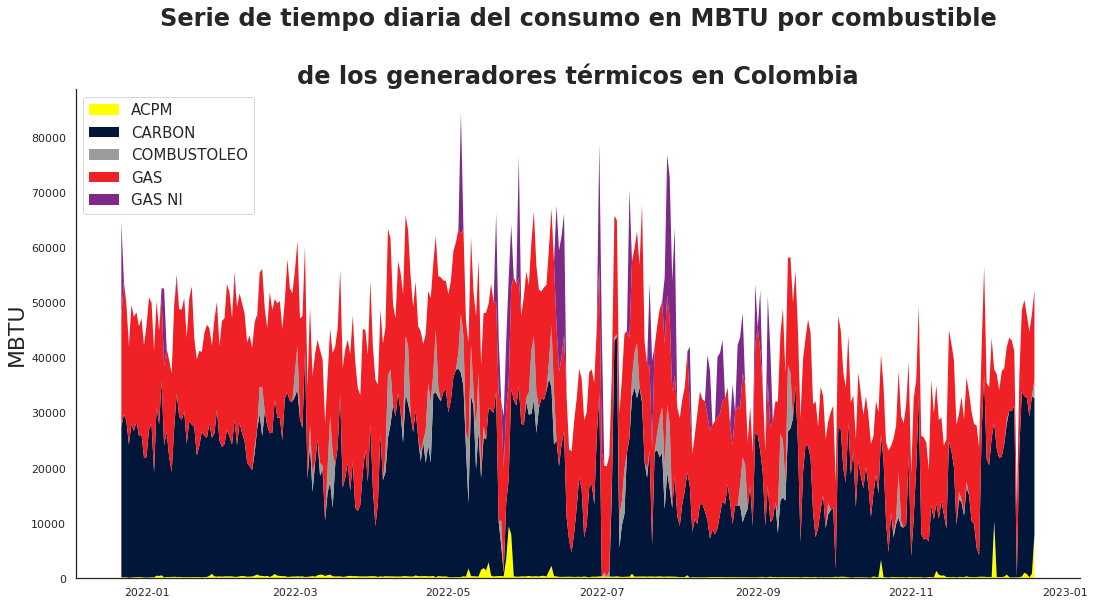

In [7]:
colors = ['yellow', '#011638', '#9c9c9c', '#ef2026', '#7e2987']
labels = ['ACPM', 'CARBON', 'COMBUSTOLEO', 'GAS', 'GAS NI']
sns.set_style('white')
plt.figure(figsize=(18,9))
plt.stackplot(
    df_st.index,
    df_st['ACPM'],
    df_st['CARBON'],
    df_st['COMBUSTOLEO'],
    df_st['GAS'],
    df_st['GAS NI'],
    colors = colors,
    edgecolor = 'none')
plt.legend(labels=labels, loc='upper left', fontsize=15)
plt.ylabel('MBTU', fontsize=22)
plt.title('''Serie de tiempo diaria del consumo en MBTU por combustible\n
de los generadores térmicos en Colombia''', fontsize=24, weight='bold')
sns.despine()
plt.show()

Autor: Juan Camilo Jaramillo Tascón: https://www.linkedin.com/in/juancjaramillot/